dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])
['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']
{'cylinders': ['3', '4', '5', '6', '8']}
[1.400e+01 4.000e+00 3.500e+02 1.650e+02 4.209e+03 1.200e+01 1.972e+03]


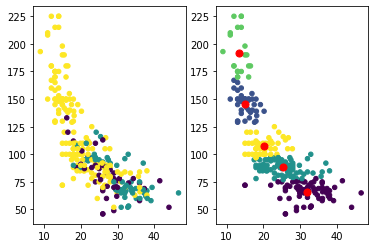

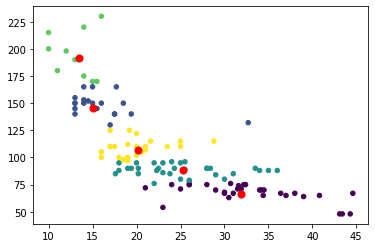

In [2]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym

from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

cars = fetch_openml('cars1')

print(cars.keys())
print(cars['feature_names'])
print(cars['categories'])
print(cars['data'][0])

# Divide the collection into features and labels
# we choose the first feature - MPG, i.e. the number of miles that can be traveled on one gallon of fuel
# we choose the fourth feature - horsepower, i.e. engine power in horsepower
X = cars.data[:, [0, 3]]
# nie ma to jak ściąga ;)
y = cars['target']
y = [int(elem) for elem in y]

# We use the function to divide the set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# We create a classifier with five clusters (classes)
kmn = KMeans(n_clusters=5)

# We teach classifier on training data
kmn.fit(X_train)

# We extract cluster focal points - we will show them on the graph next to the points from the training set
central = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# the first chart is our learning set, with real classes
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

# Now we use training data to check what the classifier thinks about them
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

# We add cluster centers on the second chart
ax[1].scatter(central[:, 0], central[:, 1], c='red', s=50)
plt.show()

# We're trying to predict car classes for the test set
y_pred = kmn.predict(X_test)

# New car classes provided by clustering
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

# As above, we display cluster centers
plt.scatter(central[:, 0], central[:, 1], c='red', s=50)
plt.show()
# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze

# W poszczególnych klastrach znalazły się samochody o różnych kombinacjach spalanie/moc silnika
## najniżej położony klaster zawiera samochody o dużym zasięgu i niskiej mocy - typowe auta miejskie
# najwyższy klaster to samochody sportowe - spora moc silnika i krótki zasięg.

# W klastrach znalazły się samochody o różnych kombinacjach spalanie/moc silnika
# najżej jest położony klaster z samochodami o małej mocy i spalaniu
# najwyżej natosmiast samochody o sporej mocy silnika i wysokim spalaniu
